In [1]:
# Importing Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from matplotlib import pyplot

In [2]:
data = pd.read_csv('../data/final-stroke-data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.2 KB


## Feature Selection

-   For Categorical Inputs - Chi-Squared test
-   For Numerical Inputs - ANOVA f-test


	----- Categorical features and its Scores -----
Gender: 0.137395
Hypertension: 58.755128
Heart Disease: 69.300932
Ever Married: 22.509206
Work Type: 22.076260
Residence Type: 0.777879
Smoking Status: 12.195822


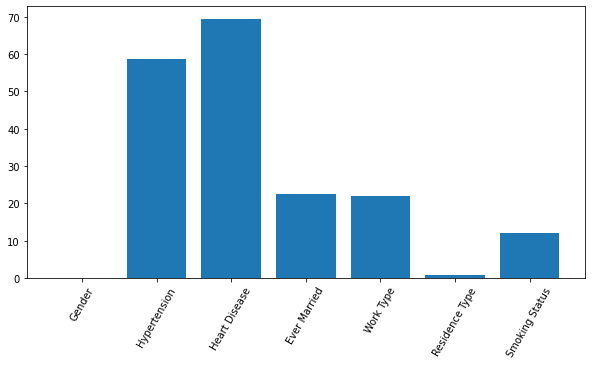

	----- Numerical features and its Scores -----
Age: 241.988292
Avg Glucose Level: 59.098331
BMI: 7.262064


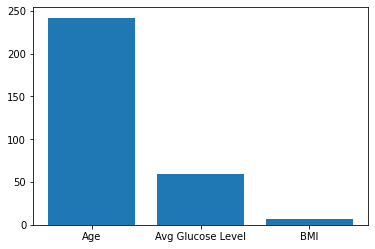

In [9]:
cat_col = ['Gender', 'Hypertension', 'Heart Disease',
           'Ever Married', 'Work Type', 'Residence Type', 'Smoking Status']
num_col = ['Age', 'Avg Glucose Level', 'BMI']


def load_data(data):
    dataset = data.values
    cat_X = dataset[:, [0, 2, 3, 4, 5, 6, 9]].astype(str)
    num_X = dataset[:, [1, 7, 8]]
    y = dataset[:, -1]
    return cat_X, num_X, y


# prepare input data for categorical columns
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


# prepare target for categorical columns
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# categorical feature selection
def cat_select_features(catX_train, caty_train, catX_test):
    cat_fs = SelectKBest(score_func=chi2, k='all')
    cat_fs.fit(catX_train, caty_train)
    catX_train_fs = cat_fs.transform(catX_train)
    catX_test_fs = cat_fs.transform(catX_test)
    return catX_train_fs, catX_test_fs, cat_fs


# numerical feature selection
def num_select_features(numX_train, numy_train, numX_test):
    num_fs = SelectKBest(score_func=f_classif, k='all')
    num_fs.fit(numX_train, numy_train)
    numX_train_fs = num_fs.transform(numX_train)
    numX_test_fs = num_fs.transform(numX_test)
    return numX_train_fs, numX_test_fs, num_fs


cat_X, num_X, y = load_data(data)


# categorical train-test split
catX_train, catX_test, caty_train, caty_test = train_test_split(cat_X, y, test_size=0.2, random_state=1)
catX_train_enc, catX_test_enc = prepare_inputs(catX_train, catX_test)
caty_train_enc, caty_test_enc = prepare_targets(caty_train, caty_test)

# categorical feature selection
catX_train_fs, catX_test_fs, catfs = cat_select_features(catX_train_enc, caty_train_enc, catX_test_enc)

# numerical train-test split
numX_train, numX_test, numy_train, numy_test = train_test_split(num_X, y, test_size=0.2, random_state=1)

# numerical feature selection
numX_train_fs, numX_test_fs, numfs = num_select_features(numX_train, numy_train, numX_test)

# what are scores for the categorical features
print("\t----- Categorical features and its Scores -----")
for i in range(len(catfs.scores_)): print(f'{cat_col[i]}: {catfs.scores_[i]:.6f}')
    
# plot the scores
pyplot.figure(figsize=(10, 5))
pyplot.bar(cat_col, catfs.scores_)
pyplot.xticks(rotation=60)
pyplot.show()

# what are scores for the numerical features
print("\t----- Numerical features and its Scores -----")
for i in range(len(numfs.scores_)): print(f'{num_col[i]}: {numfs.scores_[i]:.6f}')
        
# plot the scores
pyplot.bar(num_col, numfs.scores_)
pyplot.show()

From the above, we come to a conclusion that <br>
Categorical Columns such as **_Heart Disease_**, **_Hypertension_**, **_Ever Married_** and **_Smoking status_** and <br>
Numerical Columns such as **_Age_**, **_Average Glucose Level_** are most relevant in stroke prediction.
